In [1]:
%reload_ext autoreload
%autoreload 2

In [ ]:
# default_exp eda

# 温室温度预测挑战赛
http://challenge.xfyun.cn/topic/info?type=temperature

## 一、赛事背景

随着计算机技术的发展，我国逐渐实现了从传统农业到现代农业的转变，正逐步迈向智慧农业。温室是现代农业技术应用的典型场景，其内部环境具有可操作性，能人为形成适宜植物生长的小型封闭生态系统，提升农产品的产量和质量，因此被广泛应用于农业生产中。在温室的各项环境因子中，作物对温度最为敏感。温度的高低影响植株细胞的酶活性，从而影响作物的生长速度、产量和质量，因此温度对作物生长发育影响极大。为了保证农产品的产量和质量，应保证作物正常生长，需对温室温度进行精确的调控。

## 二、赛事任务

温室温度调控需要对温室温度进行精准的预测，本次大赛提供了中国农业大学涿州实验站的温室温度数据作为样本，参赛选手需基于提供的样本构建模型，预测温室温度变化情况。

## 三、评审规则

### 1.数据说明：

本次比赛为参赛选手提供了温室内外的部分传感器数据，包括温室内的温度、湿度、气压以及温室外的温度、湿度、气压。

本次比赛分为初赛和复赛两个阶段，初赛阶段提供约30天的传感器数据，其中前20天的数据作为训练数据，后10天的数据用于做温度预测；复赛阶段提供约15天的传感器数据，其中前10天的数据作为训练数据，后5天的数据用于做温度预测。

注1：训练集的数据，每1分钟1条数据记录；测试集的数据，每30分钟1条数据记录。

注2：选手不能利用“未来的实际数据”预测“过去的数据”，例如，假设要预测2020/6/18 08:08:08的室内温度，就不能利用这个时间点以后的真实数据进行预测。

特别说明，温室内的湿度和气压以及温室外的温度、湿度和气压会对温室内的温度产生一定的影响。

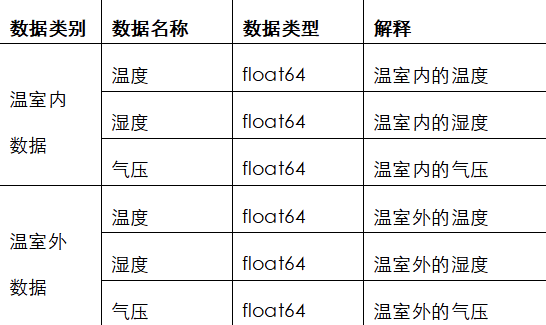

### 2.评估指标

本模型依据提交的结果文件，采用均方误差MSE进行评价。 观测值，预测值，待预测的记录数n，计算公式如下：
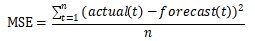

### 3.评测及排行

1、初赛和复赛均提供下载数据，选手在本地进行算法调试，在比赛页面提交结果。

2、每支团队每天最多提交3次。

3、比赛采用AB榜，A榜成绩供参赛队伍比赛中查看，最终比赛排名采用选手选择两个作品中B榜最佳成绩；
## 四、作品提交要求

1、文件格式：按照csv格式提交

2、文件大小：无要求

3、提交次数限制：每支队伍每天最多3次

4、文件详细说明：

1) 以csv格式提交，编码为UTF-8，第一行为表头；

2) 提交格式见样例

5、不需要上传其他文件
## 五、赛程规则
初赛 6月22日——8月21日

    初赛截止成绩以团队在初赛时间段内最优成绩为准（不含测试排名）。

    初赛作品提交截止日期为８月20日17:00；初赛名次公布日期为8月21日10:00。

复赛 8月21日——9月21日

    排名前20%的团队晋级复赛，大赛官网将公示团队信息。选手通过大赛官网下载新增的训练集和开发集，本地调试算法，在线提交结果。

    复赛成绩以参赛团队在复赛时间段内最优成绩为准。

    复赛作品提交截止日期为９月20日17:00；复赛名次公布日期为９月21日10:00。

决赛 10月24日

    前三名团队将受邀参加科大讯飞全球1024开发者节并于现场进行决赛。

    决赛以答辩（10min陈述+5min问答）的形式进行。

    根据复赛成绩和答辩成绩综合评分（复赛成绩占比70%，现场答辩分数占比30%）。

## 六、奖项设置

    入围复赛

        复赛入围证书

        大赛专属Geek礼包

        大赛限量文化衫

    入围决赛

        科大讯飞1024开发者节全场通票

        决赛入围证书

        科大讯飞创孵基地绿色入驻通道

        A.I.服务市场入驻特权

    决赛胜出

        决赛奖金，各赛道TOP10选手将阶梯获得赛道奖金，第一名3万元、第二名2万元、第三名1万元、第四-第十名分别获得“算法菁英奖”2500元。

        参与1024全球开发者节颁奖盛典，现场授予奖金、证书与定制奖杯

        A.I.全链创业扶持

        绿色就业通道&讯飞Offer

# 鱼佬直播
https://live.bilibili.com/3726821

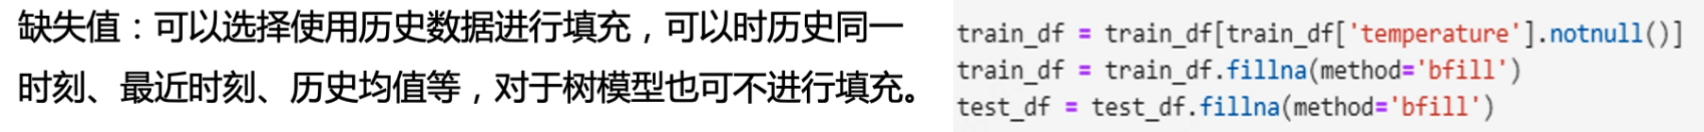

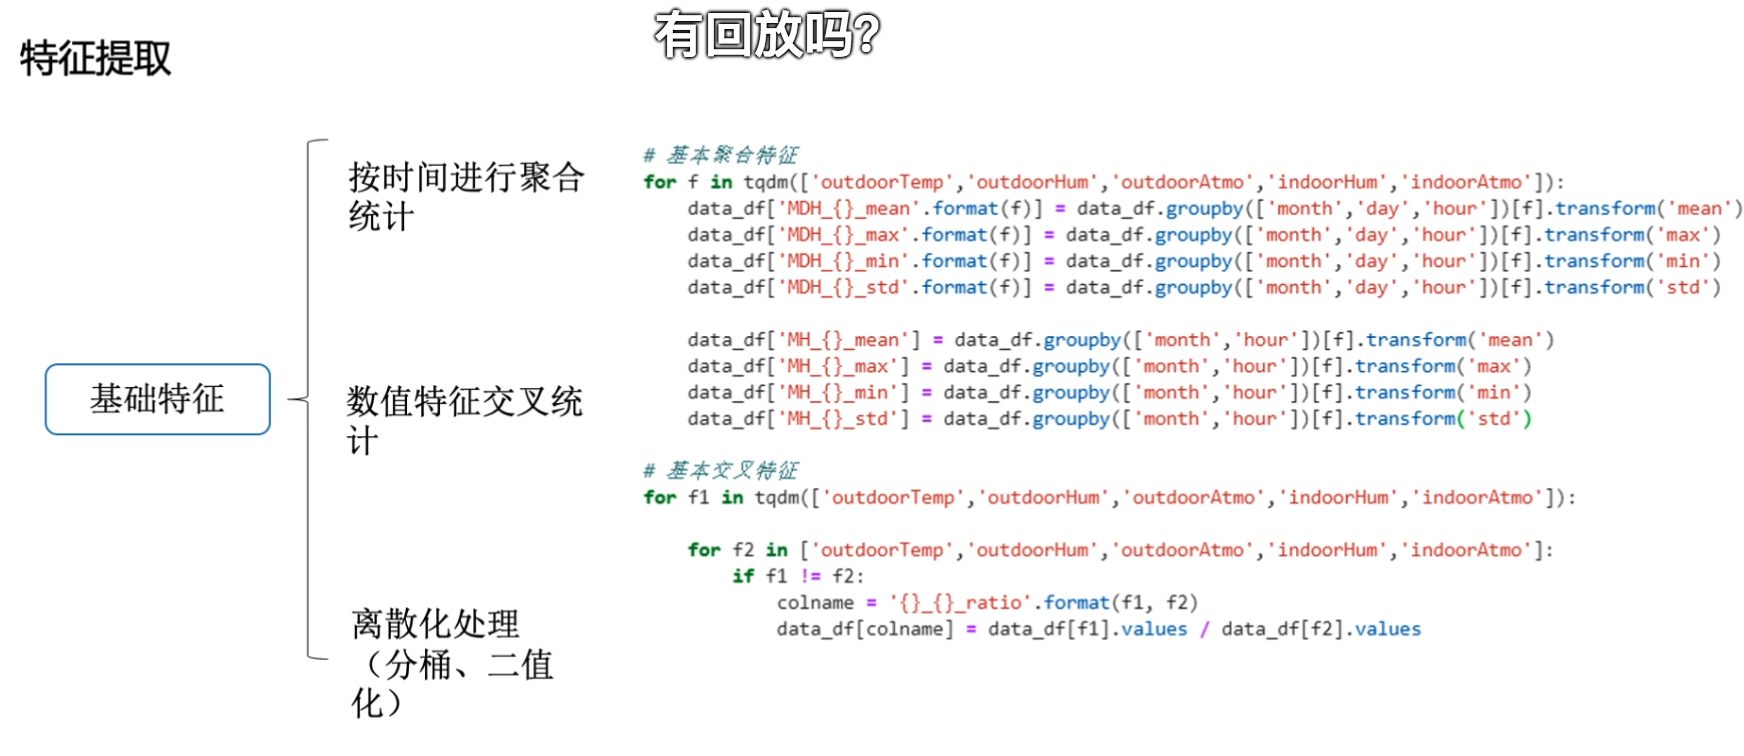

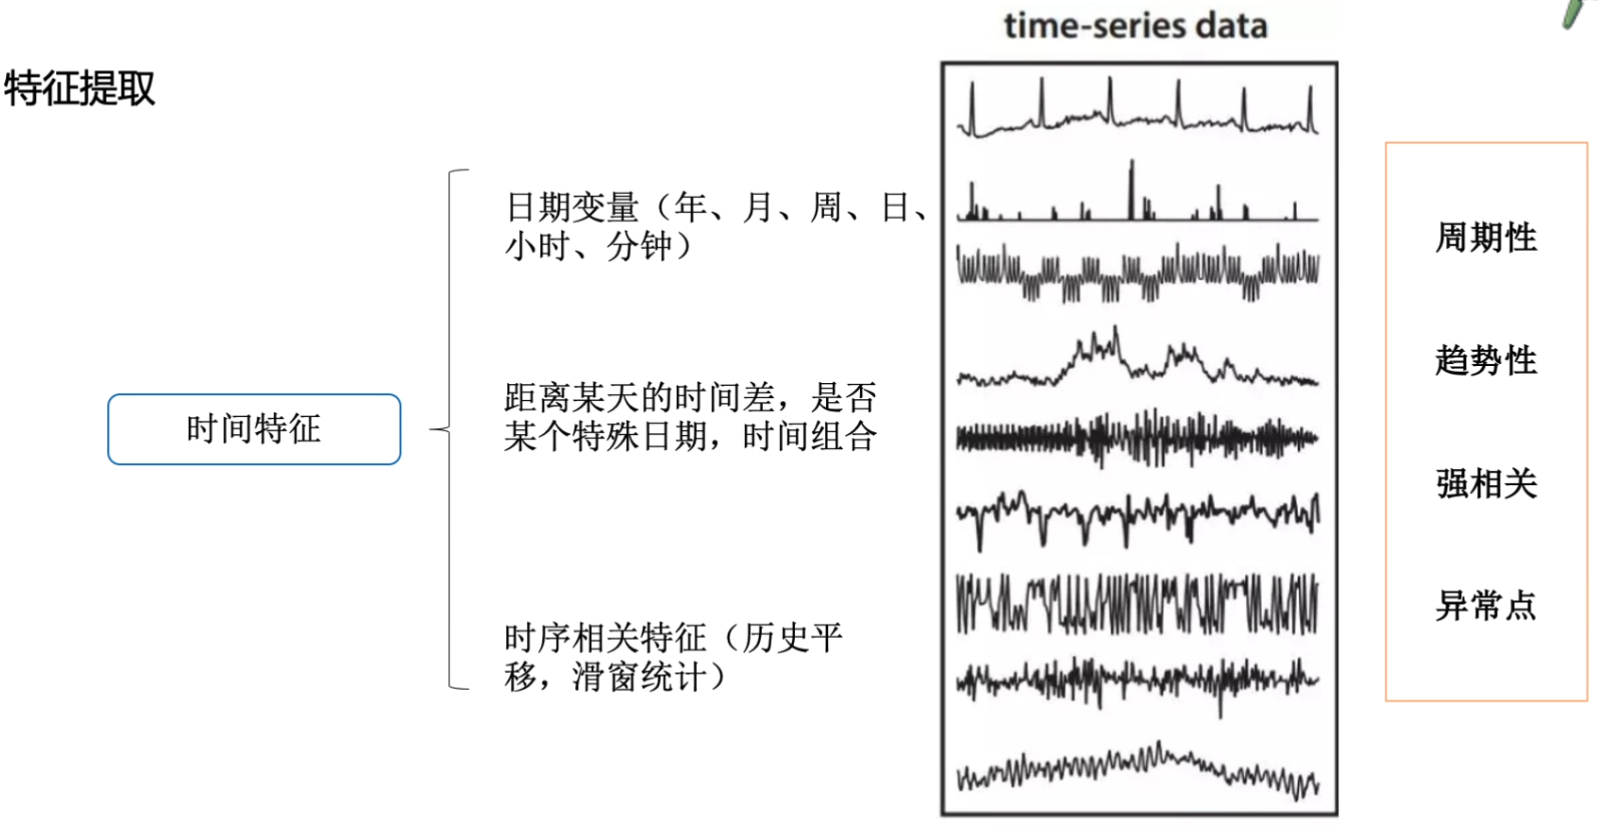

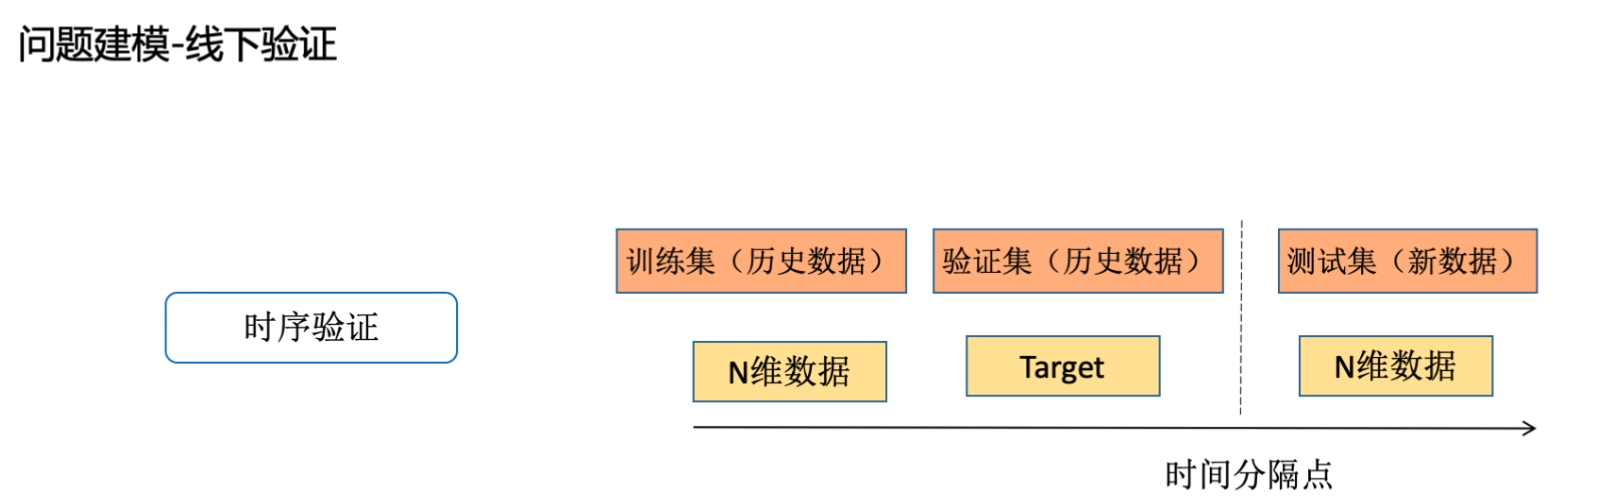

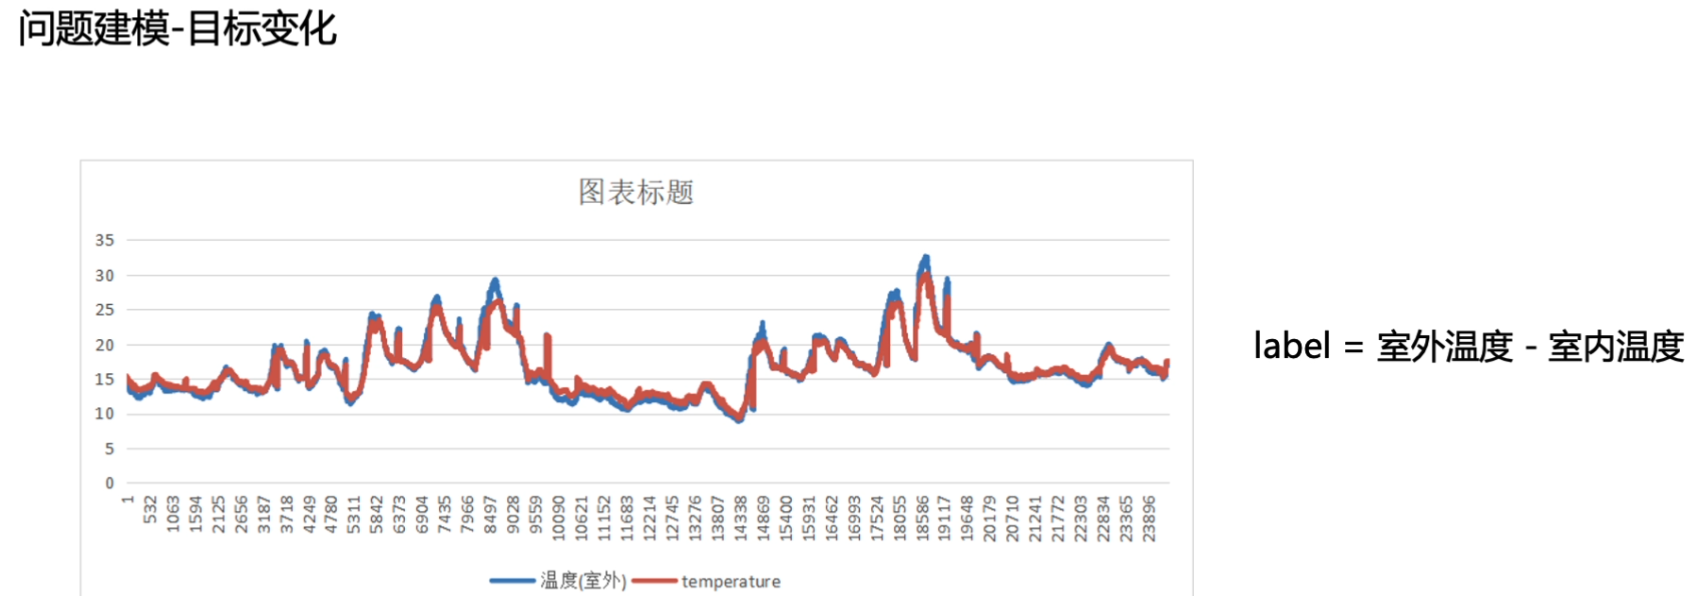

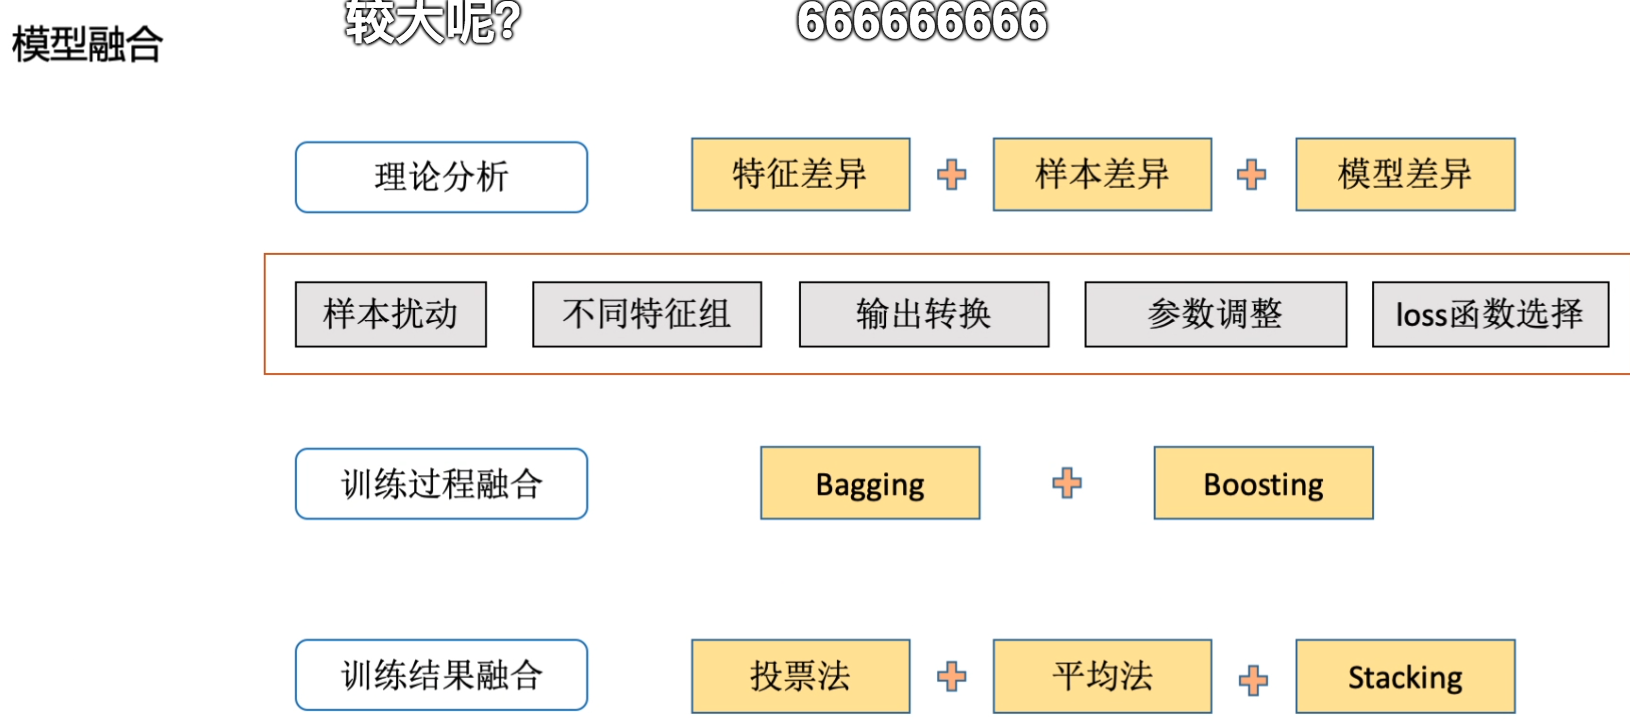

# lib导入

In [2]:
# export
import os
from code.config import * 
from loguru import logger
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)  # 设置显示数据的最大列数，防止出现省略号…，导致数据显示不全
pd.set_option('expand_frame_repr', False)  # 当列太多时不自动换行

from sklearn.metrics import classification_report, accuracy_score

In [3]:
import sys
sys.path.append('..')
import seaborn as sns
sns.set(font='Arial Unicode MS')  # 解决Seaborn中文显示问题
from mylib.utils.pickle import PickleWrapper


# load data

In [4]:
args.DATA_DIR

'../../data/contest/20kdxf/'

In [12]:
!tree ../../data/contest/20kdxf/

../../data/contest/20kdxf/
├── sub.csv
├── test
│   └── test.csv
└── train
    └── train.csv

2 directories, 3 files


# EDA

In [11]:
train = pd.read_csv(os.path.join(args.DATA_DIR,'train/train.csv'))

train.head()

,time,年,月,日,小时,分钟,秒,温度(室外),湿度(室外),气压(室外),湿度(室内),气压(室内),temperature
0,1552496443,2019,3,14,1,0,43,14.6,85.0,993.1,80.0,992.4,15.4
1,1552496503,2019,3,14,1,1,43,14.7,84.0,993.0,80.0,992.6,15.4
2,1552496565,2019,3,14,1,2,45,14.7,84.0,992.7,80.0,992.8,15.4
3,1552496624,2019,3,14,1,3,44,14.6,85.0,993.2,80.0,992.6,15.4
4,1552496682,2019,3,14,1,4,42,14.6,85.0,992.7,80.0,992.6,15.3


In [15]:
test = pd.read_csv(os.path.join(args.DATA_DIR,'test/test.csv'))
test.columns =['time', '年', '月', '日', '小时', '分钟', '秒', '温度(室外)', '湿度(室外)', '气压(室外)',
       '湿度(室内)', '气压(室内)']
test.head()

,time,年,月,日,小时,分钟,秒,温度(室外),湿度(室外),气压(室外),湿度(室内),气压(室内)
0,1554224413,2019,4,3,1,0,13,15.3,91.0,988.0,88.0,988.3
1,1554226217,2019,4,3,1,30,17,15.4,91.0,987.8,88.0,988.0
2,1554228020,2019,4,3,2,0,20,15.3,92.0,988.0,89.0,988.3
3,1554229823,2019,4,3,2,30,23,15.2,92.0,988.1,89.0,988.7
4,1554231625,2019,4,3,3,0,25,15.5,91.0,987.9,88.0,987.9


In [13]:
sub = pd.read_csv(os.path.join(args.DATA_DIR,'sub.csv'))

sub.head()

,time,temperature
0,1554224413,15.7
1,1554226217,15.7
2,1554228020,15.7
3,1554229823,15.7
4,1554231625,15.7


# baseline from yl

In [4]:
#!/usr/bin/env python
# coding: utf-8
# by Coggle数据科学

import pandas as pd
import os
import gc
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge
from sklearn.preprocessing import MinMaxScaler
import math
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

# os.path.join(args.DATA_DIR,'test/test.csv')
train_df = pd.read_csv(os.path.join(args.DATA_DIR,'train/train.csv'))
test_df = pd.read_csv(os.path.join(args.DATA_DIR,'test/test.csv'))
sub = pd.DataFrame(test_df['time'])
 

train_df = train_df[train_df['temperature'].notnull()]
train_df = train_df.fillna(method='bfill')
test_df = test_df.fillna(method='bfill')
 
train_df.columns = ['time','year','month','day','hour','min','sec','outdoorTemp','outdoorHum','outdoorAtmo','indoorHum','indoorAtmo', 'temperature']
test_df.columns = ['time','year','month','day','hour','min','sec','outdoorTemp','outdoorHum','outdoorAtmo','indoorHum','indoorAtmo']


data_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)

# 基本聚合特征
group_feats = []
for f in tqdm(['outdoorTemp','outdoorHum','outdoorAtmo','indoorHum','indoorAtmo']):
    data_df['MDH_{}_medi'.format(f)] = data_df.groupby(['month','day','hour'])[f].transform('median')
    data_df['MDH_{}_mean'.format(f)] = data_df.groupby(['month','day','hour'])[f].transform('mean')
    data_df['MDH_{}_max'.format(f)] = data_df.groupby(['month','day','hour'])[f].transform('max')
    data_df['MDH_{}_min'.format(f)] = data_df.groupby(['month','day','hour'])[f].transform('min')
    data_df['MDH_{}_std'.format(f)] = data_df.groupby(['month','day','hour'])[f].transform('std')

    group_feats.append('MDH_{}_medi'.format(f))
    group_feats.append('MDH_{}_mean'.format(f))
    
# 基本交叉特征
for f1 in tqdm(['outdoorTemp','outdoorHum','outdoorAtmo','indoorHum','indoorAtmo']+group_feats):
    
    for f2 in ['outdoorTemp','outdoorHum','outdoorAtmo','indoorHum','indoorAtmo']+group_feats:
        if f1 != f2:
            colname = '{}_{}_ratio'.format(f1, f2)
            data_df[colname] = data_df[f1].values / data_df[f2].values

data_df = data_df.fillna(method='bfill')



# 历史信息提取
data_df['dt'] = data_df['day'].values + (data_df['month'].values - 3) * 31

for f in ['outdoorTemp','outdoorHum','outdoorAtmo','indoorHum','indoorAtmo', 'temperature']:
    tmp_df = pd.DataFrame()
    for t in tqdm(range(15, 45)):
        tmp = data_df[data_df['dt']<t].groupby(['hour'])[f].agg({'mean'}).reset_index()
        tmp.columns = ['hour','hit_{}_mean'.format(f)]
        tmp['dt'] = t
        tmp_df = tmp_df.append(tmp)
    
    data_df = data_df.merge(tmp_df, on=['dt','hour'], how='left')
    
data_df = data_df.fillna(method='bfill')


# 离散化
for f in ['outdoorTemp','outdoorHum','outdoorAtmo','indoorHum','indoorAtmo']:
    data_df[f+'_20_bin'] = pd.cut(data_df[f], 20, duplicates='drop').apply(lambda x:x.left).astype(int)
    data_df[f+'_50_bin'] = pd.cut(data_df[f], 50, duplicates='drop').apply(lambda x:x.left).astype(int)
    data_df[f+'_100_bin'] = pd.cut(data_df[f], 100, duplicates='drop').apply(lambda x:x.left).astype(int)
    data_df[f+'_200_bin'] = pd.cut(data_df[f], 200, duplicates='drop').apply(lambda x:x.left).astype(int)
    
for f1 in tqdm(['outdoorTemp_20_bin','outdoorHum_20_bin','outdoorAtmo_20_bin','indoorHum_20_bin','indoorAtmo_20_bin']):
    for f2 in ['outdoorTemp','outdoorHum','outdoorAtmo','indoorHum','indoorAtmo']:
        data_df['{}_{}_medi'.format(f1,f2)] = data_df.groupby([f1])[f2].transform('median')
        data_df['{}_{}_mean'.format(f1,f2)] = data_df.groupby([f1])[f2].transform('mean')
        data_df['{}_{}_max'.format(f1,f2)] = data_df.groupby([f1])[f2].transform('max')
        data_df['{}_{}_min'.format(f1,f2)] = data_df.groupby([f1])[f2].transform('min')
       
        
for f1 in tqdm(['outdoorTemp_50_bin','outdoorHum_50_bin','outdoorAtmo_50_bin','indoorHum_50_bin','indoorAtmo_50_bin']):
    for f2 in ['outdoorTemp','outdoorHum','outdoorAtmo','indoorHum','indoorAtmo']:
        data_df['{}_{}_medi'.format(f1,f2)] = data_df.groupby([f1])[f2].transform('median')
        data_df['{}_{}_mean'.format(f1,f2)] = data_df.groupby([f1])[f2].transform('mean')
        data_df['{}_{}_max'.format(f1,f2)] = data_df.groupby([f1])[f2].transform('max')
        data_df['{}_{}_min'.format(f1,f2)] = data_df.groupby([f1])[f2].transform('min')
        
for f1 in tqdm(['outdoorTemp_100_bin','outdoorHum_100_bin','outdoorAtmo_100_bin','indoorHum_100_bin','indoorAtmo_100_bin']):
    for f2 in ['outdoorTemp','outdoorHum','outdoorAtmo','indoorHum','indoorAtmo']:
        data_df['{}_{}_medi'.format(f1,f2)] = data_df.groupby([f1])[f2].transform('median')
        data_df['{}_{}_mean'.format(f1,f2)] = data_df.groupby([f1])[f2].transform('mean')
        data_df['{}_{}_max'.format(f1,f2)] = data_df.groupby([f1])[f2].transform('max')
        data_df['{}_{}_min'.format(f1,f2)] = data_df.groupby([f1])[f2].transform('min')
        
for f1 in tqdm(['outdoorTemp_200_bin','outdoorHum_200_bin','outdoorAtmo_200_bin','indoorHum_200_bin','indoorAtmo_200_bin']):
    for f2 in ['outdoorTemp','outdoorHum','outdoorAtmo','indoorHum','indoorAtmo']:
        data_df['{}_{}_medi'.format(f1,f2)] = data_df.groupby([f1])[f2].transform('median')
        data_df['{}_{}_mean'.format(f1,f2)] = data_df.groupby([f1])[f2].transform('mean')
        data_df['{}_{}_max'.format(f1,f2)] = data_df.groupby([f1])[f2].transform('max')
        data_df['{}_{}_min'.format(f1,f2)] = data_df.groupby([f1])[f2].transform('min')


def single_model(clf, train_x, train_y, test_x, clf_name, class_num=1):

    train = np.zeros((train_x.shape[0], class_num))
    test = np.zeros((test_x.shape[0], class_num))
    
    nums = int(train_x.shape[0] * 0.80)
    
    if clf_name in ['sgd','ridge']:
        print('MinMaxScaler...')
        for col in features:
            ss = MinMaxScaler()
            ss.fit(np.vstack([train_x[[col]].values, test_x[[col]].values]))
            train_x[col] = ss.transform(train_x[[col]].values).flatten()
            test_x[col] = ss.transform(test_x[[col]].values).flatten()
    
    trn_x, trn_y, val_x, val_y = train_x[:nums], train_y[:nums], train_x[nums:], train_y[nums:]
    
    if clf_name == "lgb":
        train_matrix = clf.Dataset(trn_x, label=trn_y)
        valid_matrix = clf.Dataset(val_x, label=val_y)
        data_matrix  = clf.Dataset(train_x, label=train_y)
        
        params = {
            'boosting_type': 'gbdt',
            'objective': 'mse',
            'min_child_weight': 5,
            'num_leaves': 2 ** 8,
            'feature_fraction': 0.5,
            'bagging_fraction': 0.5,
            'bagging_freq': 1,
            'learning_rate': 0.001,
            'seed': 20201
        }

        model = clf.train(params, train_matrix, 50000, valid_sets=[train_matrix, valid_matrix], verbose_eval=500,early_stopping_rounds=1000)
        model2 = clf.train(params, data_matrix, model.best_iteration)
        val_pred = model.predict(val_x, num_iteration=model2.best_iteration).reshape(-1,1)
        test_pred = model.predict(test_x, num_iteration=model2.best_iteration).reshape(-1,1)

    if clf_name == "xgb":
        train_matrix = clf.DMatrix(trn_x , label=trn_y, missing=np.nan)
        valid_matrix = clf.DMatrix(val_x , label=val_y, missing=np.nan)
        test_matrix  = clf.DMatrix(test_x, label=val_y, missing=np.nan)
        params = {'booster': 'gbtree',
                  'eval_metric': 'mae',
                  'min_child_weight': 5,
                  'max_depth': 8,
                  'subsample': 0.5,
                  'colsample_bytree': 0.5,
                  'eta': 0.001,
                  'seed': 20201,
                  'nthread': 36,
                  'silent': True,
                  }

        watchlist = [(train_matrix, 'train'),(valid_matrix, 'eval')]

        model = clf.train(params, train_matrix, num_boost_round=50000, evals=watchlist, verbose_eval=500, early_stopping_rounds=1000)
        val_pred  = model.predict(valid_matrix, ntree_limit=model.best_ntree_limit).reshape(-1,1)
        test_pred = model.predict(test_matrix , ntree_limit=model.best_ntree_limit).reshape(-1,1)

    if clf_name == "cat":
        params = {'learning_rate': 0.001, 'depth': 5, 'l2_leaf_reg': 10, 'bootstrap_type': 'Bernoulli',
                  'od_type': 'Iter', 'od_wait': 50, 'random_seed': 11, 'allow_writing_files': False}

        model = clf(iterations=20000, **params)
        model.fit(trn_x, trn_y, eval_set=(val_x, val_y),
                  cat_features=[], use_best_model=True, verbose=500)

        val_pred  = model.predict(val_x)
        test_pred = model.predict(test_x)
    
    if clf_name == "sgd":
        params = {
            'loss': 'squared_loss',
            'penalty': 'l2',
            'alpha': 0.00001,
            'random_state': 20201,
        }
        model = SGDRegressor(**params)
        model.fit(trn_x, trn_y)
        val_pred  = model.predict(val_x)
        test_pred = model.predict(test_x)
    
    if clf_name == "ridge":
        params = {
                'alpha': 1.0,
                'random_state': 20201,
            }
        model = Ridge(**params)
        model.fit(trn_x, trn_y)
        val_pred  = model.predict(val_x)
        test_pred = model.predict(test_x)

    
    print("%s_mse_score:" % clf_name, mean_squared_error(val_y, val_pred))
    
    return val_pred, test_pred


def lgb_model(x_train, y_train, x_valid):
    lgb_train, lgb_test = single_model(lgb, x_train, y_train, x_valid, "lgb", 1)
    return lgb_train, lgb_test

def xgb_model(x_train, y_train, x_valid):
    xgb_train, xgb_test = single_model(xgb, x_train, y_train, x_valid, "xgb", 1)
    return xgb_train, xgb_test

def cat_model(x_train, y_train, x_valid):
    cat_train, cat_test = single_model(CatBoostRegressor, x_train, y_train, x_valid, "cat", 1)
    return cat_train, cat_test

def sgd_model(x_train, y_train, x_valid):
    sgd_train, sgd_test = single_model(SGDRegressor, x_train, y_train, x_valid, "sgd", 1)
    return sgd_train, sgd_test

def ridge_model(x_train, y_train, x_valid):
    ridge_train, ridge_test = single_model(Ridge, x_train, y_train, x_valid, "ridge", 1)
    return ridge_train, ridge_test


drop_columns=["time","year","sec","temperature"]


train_count = train_df.shape[0]
train_df = data_df[:train_count].copy().reset_index(drop=True)
test_df = data_df[train_count:].copy().reset_index(drop=True)


features = train_df[:1].drop(drop_columns,axis=1).columns
x_train = train_df[features]
x_test = test_df[features]

y_train = train_df['temperature'].values - train_df['outdoorTemp'].values


lr_train, lr_test = ridge_model(x_train, y_train, x_test)

sgd_train, sgd_test = sgd_model(x_train, y_train, x_test)

lgb_train, lgb_test = lgb_model(x_train, y_train, x_test)

xgb_train, xgb_test = xgb_model(x_train, y_train, x_test)

cat_train, cat_test = cat_model(x_train, y_train, x_test)


train_pred = (lr_train + sgd_train + lgb_train[:,0] + xgb_train[:,0] + cat_train) / 5
test_pred = (lr_test + sgd_test + lgb_test[:,0] + xgb_test[:,0] + cat_test) / 5


sub["temperature"] = xgb_test[:,0] + test_df['outdoorTemp'].values
sub.to_csv('sub.csv', index=False)

100%|██████████| 5/5 [00:32<00:00,  6.54s/it]


MinMaxScaler...
ridge_mse_score: 0.0441736986834117
MinMaxScaler...
sgd_mse_score: 0.03721466297244247
Training until validation scores don't improve for 1000 rounds
[500]	training's l2: 0.245463	valid_1's l2: 0.0720225
[1000]	training's l2: 0.0987689	valid_1's l2: 0.0448463
[1500]	training's l2: 0.0428319	valid_1's l2: 0.0381451
[2000]	training's l2: 0.020976	valid_1's l2: 0.0376662
[2500]	training's l2: 0.0120351	valid_1's l2: 0.0386321
Early stopping, best iteration is:
[1831]	training's l2: 0.0262588	valid_1's l2: 0.0375253
lgb_mse_score: 0.03752528172266895
[0]	train-mae:0.639878	eval-mae:0.335369
Multiple eval metrics have been passed: 'eval-mae' will be used for early stopping.

Will train until eval-mae hasn't improved in 1000 rounds.
[500]	train-mae:0.399232	eval-mae:0.236652
[1000]	train-mae:0.254435	eval-mae:0.188253
[1500]	train-mae:0.16888	eval-mae:0.169053
[2000]	train-mae:0.119335	eval-mae:0.162429
[2500]	train-mae:0.091299	eval-mae:0.159726
[3000]	train-mae:0.075403	eva

# PET
https://github.com/datawhalechina/competition-baseline/tree/master/competition/%E7%A7%91%E5%A4%A7%E8%AE%AF%E9%A3%9EAI%E5%BC%80%E5%8F%91%E8%80%85%E5%A4%A7%E8%B5%9B-%E8%84%91PET%E5%9B%BE%E5%83%8F%E5%88%86%E6%9E%90%E5%92%8C%E7%96%BE%E7%97%85%E9%A2%84%E6%B5%8B%E6%8C%91%E6%88%98%E8%B5%9B%E7%AE%97%E6%B3%95%E6%8C%91%E6%88%98%E5%A4%A7%E8%B5%9B

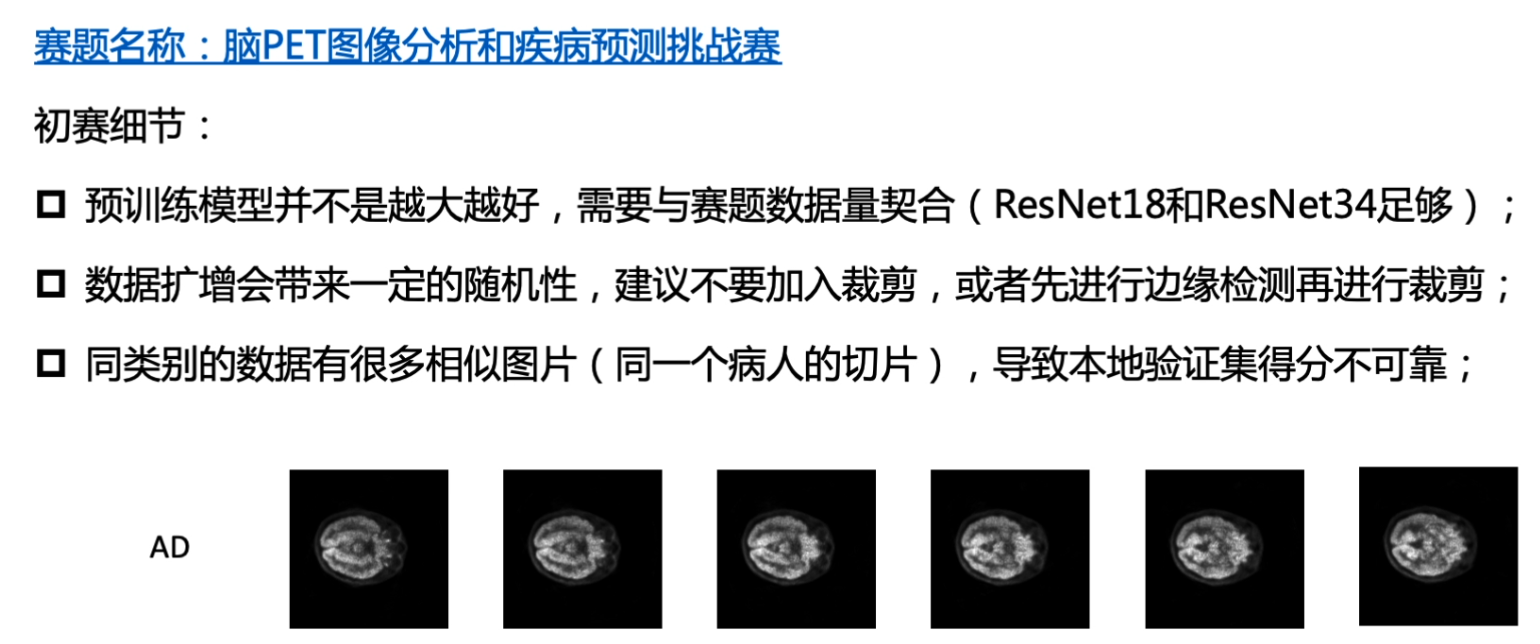

## TRIAN

In [ ]:
# -*- coding: utf-8 -*-
import os, sys, glob, argparse
import pandas as pd
import numpy as np
from tqdm import tqdm

import time, datetime
import pdb, traceback

import cv2
# import imagehash
from PIL import Image

from sklearn.model_selection import train_test_split, StratifiedKFold, KFold

# from efficientnet_pytorch import EfficientNet
# model = EfficientNet.from_pretrained('efficientnet-b4') 

import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = False
torch.backends.cudnn.benchmark = True

import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data.dataset import Dataset

# input dataset
train_jpg = np.array(glob.glob('../初赛数据/train/*/*.png'))
    
class QRDataset(Dataset):
    def __init__(self, train_jpg, transform=None):
        self.train_jpg = train_jpg
        if transform is not None:
            self.transform = transform
        else:
            self.transform = None
    
    def __getitem__(self, index):
        start_time = time.time()
        img = Image.open(self.train_jpg[index]).convert('RGB')
        
        if self.transform is not None:
            img = self.transform(img)
        
        return img,torch.from_numpy(np.array(int('AD' in self.train_jpg[index])))
    
    def __len__(self):
        return len(self.train_jpg)
    
def accuracy(output, target, topk=(1,)):
    """Computes the accuracy over the k top predictions for the specified values of k"""
    with torch.no_grad():
        maxk = max(topk)
        batch_size = target.size(0)

        _, pred = output.topk(maxk, 1, True, True)
        pred = pred.t()
        correct = pred.eq(target.view(1, -1).expand_as(pred))

        res = []
        for k in topk:
            correct_k = correct[:k].view(-1).float().sum(0, keepdim=True)
            res.append(correct_k.mul_(100.0 / batch_size))
        return res
    
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self, name, fmt=':f'):
        self.name = name
        self.fmt = fmt
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

    def __str__(self):
        fmtstr = '{name} {val' + self.fmt + '} ({avg' + self.fmt + '})'
        return fmtstr.format(**self.__dict__)

class ProgressMeter(object):
    def __init__(self, num_batches, *meters):
        self.batch_fmtstr = self._get_batch_fmtstr(num_batches)
        self.meters = meters
        self.prefix = ""


    def pr2int(self, batch):
        entries = [self.prefix + self.batch_fmtstr.format(batch)]
        entries += [str(meter) for meter in self.meters]
        print('\t'.join(entries))

    def _get_batch_fmtstr(self, num_batches):
        num_digits = len(str(num_batches // 1))
        fmt = '{:' + str(num_digits) + 'd}'
        return '[' + fmt + '/' + fmt.format(num_batches) + ']'

class VisitNet(nn.Module):
    def __init__(self):
        super(VisitNet, self).__init__()
                
        model = models.resnet34(True)
        model.avgpool = nn.AdaptiveAvgPool2d(1)
        model.fc = nn.Linear(512, 2)
        self.resnet = model
        
    def forward(self, img):        
        out = self.resnet(img)
        return out

def validate(val_loader, model, criterion):
    batch_time = AverageMeter('Time', ':6.3f')
    losses = AverageMeter('Loss', ':.4e')
    top1 = AverageMeter('Acc@1', ':6.2f')
    top5 = AverageMeter('Acc@2', ':6.2f')
    progress = ProgressMeter(len(val_loader), batch_time, losses, top1, top5)

    # switch to evaluate mode
    model.eval()

    with torch.no_grad():
        end = time.time()
        for i, (input, target) in enumerate(val_loader):
            input = input.cuda()
            target = target.cuda()

            # compute output
            output = model(input)
            loss = criterion(output, target)

            # measure accuracy and record loss
            acc1, acc5 = accuracy(output, target, topk=(1, 2))
            losses.update(loss.item(), input.size(0))
            top1.update(acc1[0], input.size(0))
            top5.update(acc5[0], input.size(0))

            # measure elapsed time
            batch_time.update(time.time() - end)
            end = time.time()

        # TODO: this should also be done with the ProgressMeter
        print(' * Acc@1 {top1.avg:.3f} Acc@5 {top5.avg:.3f}'
              .format(top1=top1, top5=top5))
        return top1

def predict(test_loader, model, tta=10):
    # switch to evaluate mode
    model.eval()
    
    test_pred_tta = None
    for _ in range(tta):
        test_pred = []
        with torch.no_grad():
            end = time.time()
            for i, (input, target) in enumerate(test_loader):
                input = input.cuda()
                target = target.cuda()

                # compute output
                output = model(input, path)
                output = output.data.cpu().numpy()

                test_pred.append(output)
        test_pred = np.vstack(test_pred)
    
        if test_pred_tta is None:
            test_pred_tta = test_pred
        else:
            test_pred_tta += test_pred
    
    return test_pred_tta

def train(train_loader, model, criterion, optimizer, epoch):
    batch_time = AverageMeter('Time', ':6.3f')
    # data_time = AverageMeter('Data', ':6.3f')
    losses = AverageMeter('Loss', ':.4e')
    top1 = AverageMeter('Acc@1', ':6.2f')
    # top5 = AverageMeter('Acc@5', ':6.2f')
    progress = ProgressMeter(len(train_loader), batch_time, losses, top1)

    # switch to train mode
    model.train()

    end = time.time()
    for i, (input, target) in enumerate(train_loader):
        input = input.cuda(non_blocking=True)
        target = target.cuda(non_blocking=True)

        # compute output
        output = model(input)
        loss = criterion(output, target)

        # measure accuracy and record loss
        acc1, acc5 = accuracy(output, target, topk=(1, 2))
        losses.update(loss.item(), input.size(0))
        top1.update(acc1[0], input.size(0))
        # top5.update(acc5[0], input.size(0))

        # compute gradient and do SGD step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()

        if i % 100 == 0:
            progress.pr2int(i)

skf = KFold(n_splits=10, random_state=233, shuffle=True)
for flod_idx, (train_idx, val_idx) in enumerate(skf.split(train_jpg, train_jpg)):    
    train_loader = torch.utils.data.DataLoader(
        QRDataset(train_jpg[train_idx],
                transforms.Compose([
                            # transforms.RandomGrayscale(),
                            transforms.Resize((512, 512)),
                            transforms.RandomAffine(10),
                            # transforms.ColorJitter(hue=.05, saturation=.05),
                            # transforms.RandomCrop((450, 450)),
                            transforms.RandomHorizontalFlip(),
                            transforms.RandomVerticalFlip(),
                            transforms.ToTensor(),
                            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
            ])
        ), batch_size=10, shuffle=True, num_workers=20, pin_memory=True
    )
    
    val_loader = torch.utils.data.DataLoader(
        QRDataset(train_jpg[val_idx],
                transforms.Compose([
                            transforms.Resize((512, 512)),
                            # transforms.Resize((124, 124)),
                            # transforms.RandomCrop((450, 450)),
                            # transforms.RandomCrop((88, 88)),
                            transforms.ToTensor(),
                            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
            ])
        ), batch_size=10, shuffle=False, num_workers=10, pin_memory=True
    )
        
    
    model = VisitNet().cuda()
    # model = nn.DataParallel(model).cuda()
    criterion = nn.CrossEntropyLoss().cuda()
    optimizer = torch.optim.SGD(model.parameters(), 0.01)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.85)
    best_acc = 0.0
    for epoch in range(10):
        scheduler.step()
        print('Epoch: ', epoch)

        train(train_loader, model, criterion, optimizer, epoch)
        val_acc = validate(val_loader, model, criterion)
        
        if val_acc.avg.item() > best_acc:
            best_acc = val_acc.avg.item()
            torch.save(model.state_dict(), './resnet18_fold{0}.pt'.format(flod_idx))
            
    break

## PRED

In [ ]:
# -*- coding: utf-8 -*-
import os, sys, glob, argparse
import pandas as pd
import numpy as np
from tqdm import tqdm

import time, datetime
import pdb, traceback

import cv2
# import imagehash
from PIL import Image

from sklearn.model_selection import train_test_split, StratifiedKFold, KFold

# from efficientnet_pytorch import EfficientNet
# model = EfficientNet.from_pretrained('efficientnet-b4') 

import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = False
torch.backends.cudnn.benchmark = True

import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data.dataset import Dataset

class QRDataset(Dataset):
    def __init__(self, train_jpg, transform=None):
        self.train_jpg = train_jpg
        if transform is not None:
            self.transform = transform
        else:
            self.transform = None
    
    def __getitem__(self, index):
        start_time = time.time()
        img = Image.open(self.train_jpg[index]).convert('RGB')
        
        if self.transform is not None:
            img = self.transform(img)
        
        return img,torch.from_numpy(np.array(int('AD' in self.train_jpg[index])))
    
    def __len__(self):
        return len(self.train_jpg)

class VisitNet(nn.Module):
    def __init__(self):
        super(VisitNet, self).__init__()
                
        model = models.resnet34(True)
        model.avgpool = nn.AdaptiveAvgPool2d(1)
        model.fc = nn.Linear(512, 2)
        self.resnet = model
        
#         model = EfficientNet.from_pretrained('efficientnet-b4') 
#         model._fc = nn.Linear(1792, 2)
#         self.resnet = model
        
    def forward(self, img):        
        out = self.resnet(img)
        return out

def predict(test_loader, model, tta=10):
    # switch to evaluate mode
    model.eval()
    
    test_pred_tta = None
    for _ in range(tta):
        test_pred = []
        with torch.no_grad():
            end = time.time()
            for i, (input, target) in enumerate(test_loader):
                input = input.cuda()
                target = target.cuda()

                # compute output
                output = model(input)
                output = output.data.cpu().numpy()

                test_pred.append(output)
        test_pred = np.vstack(test_pred)
    
        if test_pred_tta is None:
            test_pred_tta = test_pred
        else:
            test_pred_tta += test_pred
    
    return test_pred_tta

test_jpg = ['../初赛数据/test/AD&CN/{0}.png'.format(x) for x in range(1, 1001)]
test_jpg = np.array(test_jpg)

test_pred = None
for model_path in ['resnet18_fold0.pt', 'resnet18_fold1.pt', 'resnet18_fold2.pt',
                  'resnet18_fold3.pt', 'resnet18_fold4.pt', 'resnet18_fold5.pt',
                  'resnet18_fold6.pt', 'resnet18_fold7.pt', 'resnet18_fold8.pt',
                  'resnet18_fold9.pt'][:1]:
    
    test_loader = torch.utils.data.DataLoader(
        QRDataset(test_jpg,
                transforms.Compose([
                            transforms.Resize((512, 512)),
                            # transforms.CenterCrop((450, 450)),
                            transforms.RandomHorizontalFlip(),
                            transforms.RandomVerticalFlip(),
                            transforms.ToTensor(),
                            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
            ])
        ), batch_size=10, shuffle=False, num_workers=10, pin_memory=True
    )
        
    
    model = VisitNet().cuda()
    model.load_state_dict(torch.load(model_path))
    # model = nn.DataParallel(model).cuda()
    if test_pred is None:
        test_pred = predict(test_loader, model, 5)
    else:
        test_pred += predict(test_loader, model, 5)
    
test_csv = pd.DataFrame()
test_csv['uuid'] = list(range(1, 1001))
test_csv['label'] = np.argmax(test_pred, 1)
test_csv['label'] = test_csv['label'].map({1: 'AD', 0: 'CN'})
test_csv.to_csv('tmp.csv', index=None)